In [1]:
import pandas as pd
import numpy as np
import re
import string

# Search hack on dataframes

In [2]:
# # Useful Search hack for any value in a column

# # How to use: search_value(data,"movie_id","equal","tt6723088")

# def search_value(dataFrame,columnName,operation,searchElement):
#     searchFunctions = {
#         "equal": dataFrame.loc[dataFrame[columnName] == searchElement],
#         "notequal": dataFrame.loc[dataFrame[columnName] != searchElement],
#         "lesserthan": dataFrame.loc[dataFrame[columnName] < searchElement],
#         "greaterthan": dataFrame.loc[dataFrame[columnName] > searchElement],
#         "null": dataFrame.loc[dataFrame[columnName].isna()],
#         "notnull": dataFrame.loc[dataFrame[columnName].notnull()],
#         "contains": dataFrame[dataFrame[columnName].str.contains(searchElement)],
#         "notcontains": dataFrame[~dataFrame[columnName].str.contains(searchElement)],
#         "duplicate": dataFrame[dataFrame.duplicated([columnName])].sort_values(by=[columnName])    
#     }
#     operation = operation.lower().translate(str.maketrans('', '', string.whitespace))
#     if operation in searchFunctions:
#         return searchFunctions[operation]
#     else:
#         print("The search operations you can use are : \n")
#         for key,val in searchFunctions.items():
#             print(key)

In [3]:
# Useful Search hack for any value in a column

# How to use: search_value(data,"movie_id","equal","tt6723088")

def search_value(dataFrame,columnName,operation,searchElement):
    operation = operation.lower().translate(str.maketrans('', '', string.whitespace))
    if operation == "equal": 
        return dataFrame.loc[dataFrame[columnName] == searchElement]
    elif operation == "notequal":
        return dataFrame.loc[dataFrame[columnName] != searchElement]
    elif operation == "lesserthan":
        return dataFrame.loc[dataFrame[columnName] < searchElement]
    elif operation == "greaterthan": 
        return dataFrame.loc[dataFrame[columnName] > searchElement]
    elif operation == "null":
        return dataFrame.loc[dataFrame[columnName].isna()] 
    elif operation == "notnull":
        dataFrame.loc[dataFrame[columnName].notnull()]
    elif operation == "contains":
        return dataFrame[dataFrame[columnName].str.contains(searchElement)]
    elif operation == "notcontains":
        return dataFrame[~dataFrame[columnName].str.contains(searchElement)]   
    elif operation == "duplicate":
        return dataFrame[dataFrame.duplicated([columnName])].sort_values(by=[columnName])
    else:
        print("The search operations you can use are : \n")
        for key,val in searchFunctions.items():
            print(key)

In [6]:
search_value(data,"movie_id","equal","tt6723088")

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender
637357,2008-07-22,nm1982597,tt6723088,Rihanna: Disturbia (Video 2008) - IMDb,None,None,None,6.6,14,22 July 2008 (USA) See more »,2008,Rihanna,1988,\N,"soundtrack,actress,composer","tt1440129,tt2239822,tt1245492,tt2224026",2008,7,Female
637358,2008-07-22,nm0541845,tt6723088,Rihanna: Disturbia (Video 2008) - IMDb,None,None,None,6.6,14,22 July 2008 (USA) See more »,2008,Anthony Mandler,\N,\N,"director,producer,actor","tt2850272,tt7481558,tt7925124,tt6739144",2008,7,Male


In [24]:
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\01Nov2019_GenderizedData.csv'
fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Nov-04-2019.csv'

data = pd.read_csv(fileLocation)

# Reset the missing years in birth and death year of director to 0
data.loc[data['deathYear'].str.contains('N'), 'deathYear'] = 0
data.loc[data['birthYear'].str.contains('N'), 'birthYear'] = 0

In [25]:
# Number of Unique Directors

data.director_ids.nunique()

133100

In [26]:
# Extracting the year from release date column and movie column since the date published was not accurate

data['release_year'] = data.release_date.str.extract('(\d{4})', expand=False).str.strip()
data['movie_year'] = data.title.str.extract("\([^\d]*(\d{4})[^\d]*\)(?=[^()]*$)", expand=False).str.strip()

In [27]:
# Rename year column to published_year
data = data.rename(columns={'year':'published_year'})

In [ ]:
data

In [28]:
data.movie_year.value_counts(dropna = False)

NaN     45717
2014    27587
2013    27348
2015    26889
2012    25727
2011    24550
2016    24209
2009    22319
2010    22200
2008    21269
2006    21142
2007    20745
2005    19473
2004    16727
2003    15120
2002    13207
2001    11876
2000    11123
1999    10033
1998     9304
1997     8665
1996     8112
1995     7590
1994     6594
1993     6047
1989     5813
1992     5812
1990     5662
1991     5600
1985     5546
        ...  
1913      257
1920      257
1914      250
1919      247
1918      220
1909      216
1911      215
1910      201
1908      175
1896      122
1897      117
1906      112
1907      104
1900      101
1898       89
1903       86
1905       75
1899       74
1904       67
1901       66
1894       53
1895       43
1902       42
2017       27
1891       14
1892        6
1890        6
1888        4
1887        1
1893        1
Name: movie_year, Length: 131, dtype: int64

In [ ]:
# data.release_year.value_counts(dropna = False)

In [29]:
# # Approach where we keep main reference as release_year and copy from movie_year followed by published_year

# # Fill missing values in release year with that of movie year
# data.loc[data['release_year'].isna(),'release_year'] = data['movie_year']
# data.loc[data['release_year'].isna(),'release_year'] = data['published_year']
# data.release_year.value_counts(dropna = False)
# data.release_year = data.release_year.astype(int)

#data.loc[data['release_year'].isna()]

In [30]:
# Approach where we keep main reference as movie_year and copy from release_year followed by published_year

# Fill missing values in movie_year with that of release_yearyear
data.loc[data['movie_year'].isna(),'movie_year'] = data['release_year']
data.loc[data['movie_year'].isna(),'movie_year'] = data['published_year']
data.movie_year.value_counts(dropna = False)
data.movie_year = data.movie_year.astype(int)

# Cross check if any movie_year value is missing further 
data.loc[data['movie_year'].isna()]

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year


In [31]:
data

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,1894,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894
1,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,1892,Émile Reynaud,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892
2,1892-10-28,nm0721526,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,28 October 1892 (France) See more »,1892,Émile Reynaud,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892
3,1892-10-28,nm0721526,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,28 October 1892 (France) See more »,1892,Émile Reynaud,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892
4,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,1893,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893
5,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,1894,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894
6,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,NaN,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894
7,2008-12-31,nm0374658,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,NaN,William Heise,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2008,12,Male,1894
8,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,1894,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894
9,1894-10-09,nm0085156,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,9 October 1894 (USA) See more »,1894,Alexander Black,1859,1940,"director,writer,cinematographer",tt0000009,1894,10,Male,1894


In [32]:
data.movie_year.value_counts(dropna = False)

2014    28103
2013    28045
2015    27266
2012    26605
2011    25320
2016    24226
2009    23289
2010    23070
2008    22314
2006    22156
2007    21862
2005    20891
2004    18154
2003    16240
2002    14740
2001    13189
2000    12261
1999    11022
1998    10245
1997     9615
1996     9350
1995     8536
1994     7348
1993     6858
1989     6604
1992     6487
1990     6460
1991     6274
1987     6234
1985     6130
        ...  
1920      257
1913      257
1914      250
1919      247
1918      220
1909      216
1911      215
1910      201
1908      175
1896      122
1897      117
1906      112
1907      104
1900      101
1898       89
1903       86
1905       75
1899       74
1904       67
1901       66
1894       53
1895       43
1902       42
2017       29
1891       14
1892        6
1890        6
1888        4
1893        1
1887        1
Name: movie_year, Length: 130, dtype: int64

In [33]:
# Sort ascending by movie_year to find the first release year of each director

#sortAscendingDF = data.sort_values(by='release_year',ascending = True)
sortAscendingDF = data.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

In [34]:
AscendingWithoutDuplicatesDP

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year
496773,2015-12-16,nm1284117,tt2075247,Man Walking Around the Corner (1887) - IMDb,5,1,None,5.2,622,None,NaN,Louis Aimé Augustin Le Prince,1842,1890,"director,cinematographer,editor","tt0392728,tt0343112,tt1758563,tt2075247",2015,12,Male,1887
557687,2013-11-12,nm6027351,tt3274100,Pferd und Reiter Springen über ein Hindernis (...,1,None,None,6.0,84,None,NaN,Ottomar Anschütz,1846,1907,"director,cinematographer",tt3274100,2013,11,Male,1888
211729,2014-02-21,nm0005690,tt0416046,Csínytevések 2. (1890) - IMDb,7,1,None,5.1,621,1890 (USA) See more »,1890,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2014,2,Male,1890
211730,2014-02-21,nm0374658,tt0416046,Csínytevések 2. (1890) - IMDb,7,1,None,5.1,621,1890 (USA) See more »,1890,William Heise,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2014,2,Male,1890
397743,2015-08-14,nm2954641,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,NaN,Wordsworth Donisthorpe,1847,1914,"director,cinematographer",tt1202028,2015,8,Male,1890
397742,2015-08-14,nm2955286,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,NaN,William Carr Crofts,1846,1894,"director,cinematographer",tt1202028,2015,8,Male,1890
554446,2013-11-22,nm2930046,tt3201916,Je vous aime (1891) - IMDb,1,None,None,4.9,102,1891 (France) See more »,1891,Georges Demenÿ,1850,1917,director,"tt3201916,tt1189066,tt1189078",2013,11,Male,1891
566872,2015-08-22,nm4620889,tt3508566,La vague (1891) - IMDb,2,None,None,4.8,184,None,NaN,Étienne-Jules Marey,1830,1904,"director,producer,cinematographer","tt2049440,tt5447082,tt5285442,tt8588366",2015,8,Male,1891
1,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,1892,Émile Reynaud,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892
152246,2005-06-01,nm0525910,tt0234520,A walesi herceg (1892) - IMDb,1,None,None,6.9,58,None,NaN,Louis Lumière,1864,1948,"producer,director,cinematographer","tt6231346,tt1167665,tt0000014,tt0000012",2005,6,Male,1892


In [86]:
# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

WithFirstMovieYearDF = data.merge(fetchFirstMovieYearDF, on='director_ids')
WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1

In [87]:
WithFirstMovieYearDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7


In [88]:
#WithFirstMovieYearDF.nunique()

In [89]:
#WithFirstMovieYearDF.Career_Year_Number.value_counts()

In [90]:
#WithFirstMovieYearDF.deathYear.value_counts()

In [91]:
# Convert into int years before using

WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)

In [92]:
# If the movie is released after 30 years of director's dead. We are considering it as corrupt dates.
#WithFirstMovieYearDF['checkDeath'] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.deathYear


In [ ]:
#WithFirstMovieYearDF.drop(WithFirstMovieYearDF[(WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.deathYear) > 30 ].index , inplace=True)

In [99]:
WithFirstMovieYearDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7


In [ ]:
#WithFirstMovieYearDF.loc[(WithFirstMovieYearDF.Career_Year_Number > 70) & (WithFirstMovieYearDF.deathYear <= WithFirstMovieYearDF.movie_year)]

In [93]:
# Search for a value in a column

search_value(WithFirstMovieYearDF,"Career_Year_Number","greater than",70)

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number
194,2008-07-10,nm0525908,tt0434166,Lumière (1966) - IMDb,2,None,None,7.2,11,None,...,1862,1954,"producer,director,actor","tt8485720,tt0000012,tt8488118,tt0178809",2008,7,Male,1966,1896,71
2154,2003-12-10,nm0823088,tt0408636,Les contes de l'horloge magique (2003) - IMDb,2critic,None,None,7.2,31,10 December 2003 (France) See more »,...,1882,1965,"director,writer,cinematographer","tt0003441,tt0002880,tt0211127,tt0005994",2003,12,Male,2003,1912,92
2222,2011-10-13,nm0565560,tt2091980,The Flying House (2011) - IMDb,1,1,None,7.9,29,13 October 2011 (USA) See more »,...,1871,1934,"writer,director,producer","tt0004008,tt0002260,tt0126880,tt0009620",2011,10,Female,2011,1911,101
4087,2003-10-14,nm0909825,tt0439457,Barbra Streisand: The Movie Album (Video 2003)...,1,None,None,6.9,35,14 October 2003 (USA) See more »,...,1887,1980,"director,actor,writer","tt0004972,tt0015400,tt0022582,tt0019344",2003,10,Male,2003,1914,90
7200,2014-09-17,nm0281808,tt2630514,The Legend Floyd: The Dark Side of the Rainbow...,1,None,None,8.5,28,2000 (USA) See more »,...,1889,1949,"director,cinematographer,producer","tt0032138,tt0035959,tt0031381,tt0030848",2014,9,Male,2000,1919,82
8870,2015-08-19,nm0448915,tt0046634,Passport to Danger (TV Series 1954–1958) - IMDb,2,None,None,8.1,17,None,...,1896,1980,"director,actor,writer","tt0034786,tt0037793,tt0027573,tt0022094",2015,8,Male,2015,1921,95
12318,2014-04-28,nm0000033,tt3455796,Memory of the Camps (TV Movie 2014) - IMDb,3,1,None,8.4,179,13 October 2014 (UK) See more »,...,1899,1980,"actor,director,producer","tt0052357,tt0053125,tt0054215,tt0056869",2014,4,Male,2014,1925,90
13512,2004-12-01,nm0279202,tt0470038,The Contemplative Films of Oskar Fischinger (V...,None,None,None,7.7,15,1 December 2004 (USA) See more »,...,1900,1967,"director,special_effects,animation_department","tt0018299,tt0019901,tt0024735,tt0018237",2004,12,Male,2004,1926,79
14794,1989-03-19,nm0412235,tt0096337,Une histoire de vent (1988) - IMDb,1,3,None,7.3,519,19 March 1989 (France) See more »,...,1898,1989,"director,writer,cinematographer","tt0096337,tt0177321,tt0050948,tt0059455",1989,3,Male,1988,1911,78
15263,2005-07-06,nm0293989,tt0098861,Merrie Melodies: Starring Bugs Bunny and Frien...,2,None,None,8.4,869,None,...,1906,1995,"producer,director,writer","tt0202179,tt0058472,tt0155573,tt0244137",2005,7,Male,2005,1928,78


In [104]:
# Drop all values which has career year number greater than 70 and whose movies has been recorded even after death
WithFirstMovieYearDF.drop(WithFirstMovieYearDF.loc[(WithFirstMovieYearDF.Career_Year_Number > 70) & (WithFirstMovieYearDF.deathYear <= WithFirstMovieYearDF.movie_year)].index, inplace= True)

In [105]:
WithFirstMovieYearDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7


# Cleaned the data for Pivot operations

In [106]:
# Act as a counter for pivot table calculations

WithFirstMovieYearDF['Dummy'] = 1

In [107]:
WithFirstMovieYearDF.head()

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number,Dummy
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5,1
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4,1
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5,1
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5,1
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5,1


In [108]:
WithFirstMovieYearDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,deathYear,primaryProfession,knownForTitles,published_year,month,Gender,movie_year,CareerStartYear,Career_Year_Number,Dummy
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5,1
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4,1
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5,1
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5,1
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5,1
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7,1
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7,1
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1


In [109]:
WithFirstMovieYearDF.nunique()

date_published          33827
director_ids           133100
movie_id               516205
title                  514512
review_count_user        1048
review_count_critic       538
metascore                 101
rating_value               92
rating_count            14770
release_date           173782
release_year              131
primaryName            130590
birthYear                 162
deathYear                 114
primaryProfession        4041
knownForTitles         131826
published_year            129
month                      12
Gender                      2
movie_year                130
CareerStartYear           129
Career_Year_Number         82
Dummy                       1
dtype: int64

In [110]:
malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']

In [111]:
malePivotData.nunique()

date_published          33457
director_ids           103914
movie_id               445803
title                  444582
review_count_user        1020
review_count_critic       534
metascore                 101
rating_value               92
rating_count            13949
release_date           157149
release_year              131
primaryName            101551
birthYear                 162
deathYear                 113
primaryProfession        3531
knownForTitles         103180
published_year            129
month                      12
Gender                      1
movie_year                130
CareerStartYear           129
Career_Year_Number         82
Dummy                       1
dtype: int64

In [112]:
femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']

In [113]:
femalePivotData.nunique()

date_published         17575
director_ids           29186
movie_id               87755
title                  87672
review_count_user        456
review_count_critic      284
metascore                 89
rating_value              92
rating_count            5168
release_date           53907
release_year             120
primaryName            29039
birthYear                136
deathYear                 95
primaryProfession       1960
knownForTitles         28963
published_year           117
month                     12
Gender                     1
movie_year               122
CareerStartYear          117
Career_Year_Number        65
Dummy                      1
dtype: int64

In [251]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)

In [252]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

In [253]:
overallPivotTable = pd.pivot_table(WithFirstMovieYearDF, values='Dummy', index=['director_ids'],
                                   columns=['Career_Year_Number'], aggfunc=np.sum)

In [254]:
femalePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,71
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000096,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000097,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000098,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000099,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000113,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000125,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000149,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000159,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000161,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
malePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,73,74,75,76,77,78,79,80,82,84
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,NaN,3.0,3.0,4.0,1.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
overallPivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,73,74,75,76,77,78,79,80,82,84
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,NaN,3.0,3.0,4.0,1.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#overallPivotTable = overallPivotTable[overallPivotTable.columns[::-1]]

In [ ]:
#firstValidcolumn = malePivotTable.idxmax(axis = 'columns')
#firstValidcolumn = overallPivotTable.stack().groupby(level=0).first()

# Capture career length

In [211]:
overallPivotTable = saef.copy()
saef = overallPivotTable.copy()

In [209]:
# # Reverse the columns to search from the last career year number
# overallPivotTable = overallPivotTable[overallPivotTable.columns[::-1]]

In [257]:
# Function to find the column name of the last non null value. This is our career length of every director

def columnNameOfFirstNonNullValue(x):
    if x.last_valid_index() is None:
        return None
    else:
        return x.last_valid_index()

In [258]:
career_length_overall = overallPivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')

In [262]:
#career_length_overall
#career_length_male
career_length_female

director_ids
nm0000096    22
nm0000097     1
nm0000098     6
nm0000099     4
nm0000113     1
nm0000125     1
nm0000149    34
nm0000159     2
nm0000161     1
nm0000162     1
nm0000166    25
nm0000183     1
nm0000187     6
nm0000193     1
nm0000204     8
nm0000212     1
nm0000272     8
nm0000275     4
nm0000278    12
nm0000291     6
nm0000294    27
nm0000333     1
nm0000360     1
nm0000365    14
nm0000368    20
nm0000376    13
nm0000379     4
nm0000398     5
nm0000420     4
nm0000443     1
             ..
nm8877890     1
nm8881438     1
nm8881574     1
nm8891063     1
nm8893838     1
nm8894053     1
nm8896364     1
nm8899918     1
nm8910409     1
nm8925839     1
nm8941286     1
nm8941842     1
nm8942637     1
nm8947574     3
nm8948671     1
nm8970197     1
nm8977901     1
nm8982559     1
nm9007678     4
nm9014563     1
nm9026707     1
nm9032790     1
nm9036921     1
nm9045847     1
nm9054505     1
nm9080011     1
nm9082106     1
nm9115348     1
nm9121758     1
nm9171062     1
Length: 291

In [217]:
# Verify
#career_length_overall['nm0210701']
career_length_overall['nm0000080']


67

In [151]:
#overallPivotTable[overallPivotTable.notnull()].to_csv('csv.csv')
#nm0210701


In [218]:
career_length_overall.tolist()

[62,
 1,
 1,
 1,
 3,
 40,
 1,
 17,
 61,
 49,
 28,
 49,
 53,
 21,
 29,
 1,
 1,
 20,
 5,
 33,
 1,
 9,
 5,
 27,
 17,
 67,
 23,
 1,
 22,
 1,
 37,
 10,
 51,
 22,
 1,
 6,
 4,
 1,
 1,
 14,
 8,
 8,
 32,
 27,
 1,
 1,
 25,
 1,
 32,
 48,
 54,
 13,
 1,
 14,
 58,
 13,
 1,
 28,
 14,
 5,
 4,
 24,
 46,
 3,
 1,
 34,
 3,
 24,
 24,
 28,
 1,
 23,
 2,
 21,
 1,
 1,
 35,
 18,
 48,
 25,
 20,
 1,
 20,
 43,
 1,
 41,
 7,
 49,
 6,
 2,
 1,
 1,
 1,
 1,
 20,
 16,
 18,
 37,
 1,
 8,
 1,
 41,
 1,
 4,
 54,
 1,
 18,
 4,
 9,
 56,
 33,
 46,
 29,
 1,
 15,
 5,
 42,
 45,
 1,
 1,
 24,
 19,
 37,
 65,
 40,
 8,
 36,
 10,
 4,
 11,
 39,
 12,
 1,
 16,
 1,
 1,
 6,
 27,
 2,
 1,
 29,
 46,
 49,
 34,
 5,
 1,
 28,
 55,
 36,
 28,
 49,
 19,
 1,
 6,
 1,
 47,
 35,
 14,
 16,
 20,
 10,
 15,
 10,
 13,
 1,
 4,
 39,
 22,
 37,
 33,
 21,
 24,
 34,
 1,
 5,
 26,
 1,
 60,
 27,
 1,
 6,
 46,
 3,
 9,
 61,
 4,
 47,
 44,
 10,
 44,
 1,
 10,
 41,
 9,
 6,
 6,
 1,
 1,
 26,
 8,
 29,
 1,
 17,
 1,
 37,
 35,
 18,
 15,
 1,
 1,
 1,
 59,
 42,
 25,
 46,
 1,
 1,
 1,
 1,

In [263]:
overallPivotTable["career_length"] = career_length_overall.tolist()
malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()

In [264]:
overallPivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,74,75,76,77,78,79,80,82,84,career_length
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
nm0000033,1.0,NaN,3.0,3.0,4.0,1.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61


In [265]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- Overall

m1 = overallPivotTable.columns[:-1].values <= overallPivotTable.career_length.values[:, None]
overallPivotTableFinal = overallPivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m1)

In [266]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)

In [268]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)

In [269]:
overallPivotTableFinal.count(axis=0)

Career_Year_Number
1     133100
2      56059
3      51785
4      47364
5      43174
6      39238
7      35787
8      32653
9      29745
10     27197
11     24851
12     22714
13     20748
14     19044
15     17479
16     16095
17     14867
18     13804
19     12724
20     11782
21     10879
22     10041
23      9304
24      8641
25      7968
26      7389
27      6867
28      6318
29      5843
30      5424
       ...  
53       429
54       358
55       309
56       260
57       221
58       174
59       148
60       136
61       117
62        95
63        81
64        51
65        29
66        23
67        16
68        11
69         8
70         6
71         4
72         3
73         3
74         2
75         2
76         2
77         2
78         2
79         1
80         1
82         1
84         1
Length: 82, dtype: int64

In [270]:
overallPivotTableFinal.sum(axis=0)

Career_Year_Number
1     148174.0
2      24467.0
3      25446.0
4      24701.0
5      24022.0
6      23051.0
7      22534.0
8      21711.0
9      20992.0
10     20199.0
11     19291.0
12     18435.0
13     17321.0
14     16336.0
15     15360.0
16     14142.0
17     13654.0
18     12530.0
19     11996.0
20     11462.0
21     11019.0
22      9813.0
23      9606.0
24      8643.0
25      7993.0
26      7203.0
27      7222.0
28      6633.0
29      6019.0
30      5949.0
        ...   
53       526.0
54       432.0
55       387.0
56       342.0
57       254.0
58       204.0
59       188.0
60       121.0
61       149.0
62       127.0
63       167.0
64       100.0
65        31.0
66        13.0
67         6.0
68         5.0
69         3.0
70         3.0
71         3.0
72         2.0
73         2.0
74         1.0
75         2.0
76         1.0
77         2.0
78         2.0
79         1.0
80         2.0
82         2.0
84         2.0
Length: 82, dtype: float64

# Maybe use this to calculate top 3 directors

In [ ]:
# Maybe use this to calculate top 3 Female directors
femalePivotTable.sum(axis=1)

In [ ]:
femalePivotTable.sum(axis=0)

In [ ]:
# Count non null values in rows
femalePivotTable.count(axis=0)

In [ ]:
malePivotTable.sum(axis=0)

In [274]:
femalePivotTableFinal.shape[0]

29186

In [276]:
malePivotTableFinal.shape[0]

103914

In [277]:
overallPivotTableFinal.shape[0]

133100

In [280]:
# Divide by overall gender directors ( dividing by shape )

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.shape[0]
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.shape[0]
overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# Divide by overall directors  ( dividing by shape )

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# Divide by values with respect to each directors career length ( dividing by count, this neglects the NA in the column )

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)
overall_avg_movie_per_year = overallPivotTableFinal.sum(axis=0) / overallPivotTableFinal.count(axis=0)


In [283]:
male_avg_movie_per_year

Career_Year_Number
1     1.119012
2     0.456148
3     0.508104
4     0.539832
5     0.578633
6     0.613756
7     0.658260
8     0.704351
9     0.739174
10    0.770786
11    0.813187
12    0.855168
13    0.874457
14    0.894660
15    0.924493
16    0.926804
17    0.973096
18    0.959450
19    0.979167
20    1.009060
21    1.046079
22    1.013934
23    1.073302
24    1.034321
25    1.044444
26    1.017938
27    1.093011
28    1.093762
29    1.070877
30    1.144728
        ...   
53    1.308901
54    1.197492
55    1.326165
56    1.427350
57    1.176768
58    1.212500
59    1.352941
60    0.903226
61    1.292453
62    1.298851
63    2.118421
64    2.063830
65    1.107143
66    0.590909
67    0.400000
68    0.500000
69    0.428571
70    0.600000
71    0.666667
72    0.666667
73    0.666667
74    0.500000
75    1.000000
76    0.500000
77    1.000000
78    1.000000
79    1.000000
80    2.000000
82    2.000000
84    2.000000
Length: 82, dtype: float64

In [282]:
female_avg_movie_per_year

Career_Year_Number
1     1.092750
2     0.355858
3     0.422682
4     0.445436
5     0.463203
6     0.476197
7     0.507864
8     0.494961
9     0.559784
10    0.619274
11    0.612593
12    0.615459
13    0.652830
14    0.685263
15    0.660726
16    0.646143
17    0.651365
18    0.650519
19    0.760397
20    0.791220
21    0.843785
22    0.790146
23    0.824607
24    0.826148
25    0.792813
26    0.752706
27    0.838565
28    0.815261
29    0.811752
30    0.836299
        ...   
36    0.847575
37    0.789203
38    0.737569
39    0.653731
40    0.686275
41    0.690141
42    0.722656
43    0.754310
44    0.840580
45    0.948187
46    0.733728
47    0.797203
48    0.589286
49    0.568421
50    0.511905
51    0.500000
52    0.721311
53    0.553191
54    1.282051
55    0.566667
56    0.307692
57    0.913043
58    0.714286
59    0.333333
60    0.750000
61    1.090909
62    1.750000
63    1.200000
64    0.750000
71    1.000000
Length: 65, dtype: float64

In [281]:
overall_avg_movie_per_year

Career_Year_Number
1     1.113253
2     0.436451
3     0.491378
4     0.521514
5     0.556400
6     0.587466
7     0.629670
8     0.664901
9     0.705732
10    0.742692
11    0.776267
12    0.811614
13    0.834827
14    0.857803
15    0.878769
16    0.878658
17    0.918410
18    0.907708
19    0.942785
20    0.972840
21    1.012869
22    0.977293
23    1.032459
24    1.000231
25    1.003138
26    0.974827
27    1.051697
28    1.049858
29    1.030122
30    1.096792
        ...   
53    1.226107
54    1.206704
55    1.252427
56    1.315385
57    1.149321
58    1.172414
59    1.270270
60    0.889706
61    1.273504
62    1.336842
63    2.061728
64    1.960784
65    1.068966
66    0.565217
67    0.375000
68    0.454545
69    0.375000
70    0.500000
71    0.750000
72    0.666667
73    0.666667
74    0.500000
75    1.000000
76    0.500000
77    1.000000
78    1.000000
79    1.000000
80    2.000000
82    2.000000
84    2.000000
Length: 82, dtype: float64

In [284]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [285]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [286]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [287]:
overallAvgDF = overall_avg_movie_per_year.to_frame()
overallAvgDF = overallAvgDF.reset_index(inplace= False)
overallAvgDF.columns = ['Career_Year_Number', 'Average']

In [247]:
overallAvgDF

,Career_Year_Number,Average
0,1,1.113253
1,2,0.436451
2,3,0.491378
3,4,0.521514
4,5,0.556400
5,6,0.587466
6,7,0.629670
7,8,0.664901
8,9,0.705732
9,10,0.742692


In [288]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



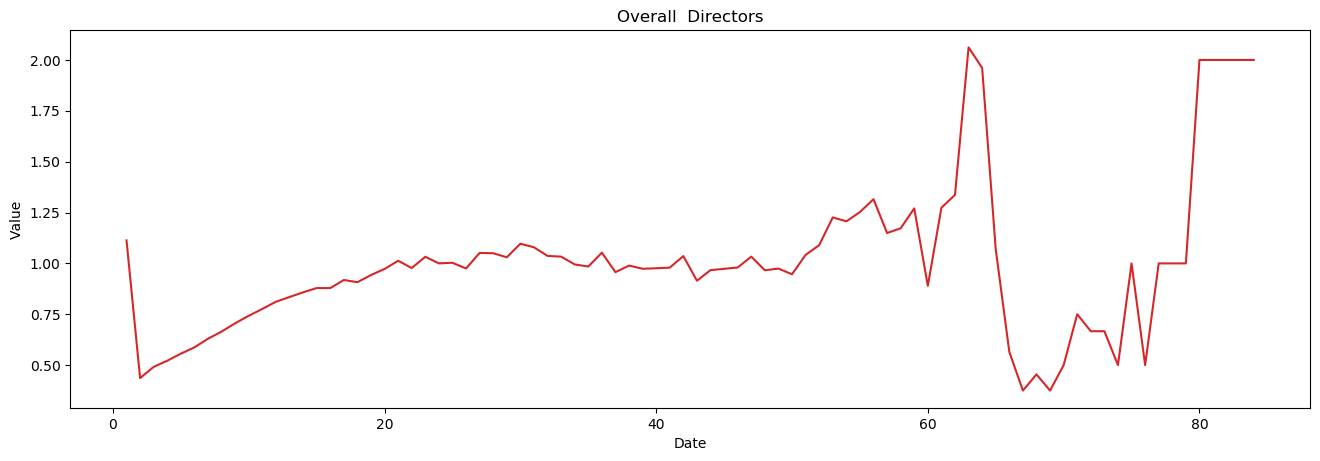

In [290]:
# Number of movies produced over the years by both the gender

careerYearOverallDF = pd.DataFrame({'Career_Year_Number':overall_avg_movie_per_year.index,'Average':overall_avg_movie_per_year.values})
careerYearOverallDF.Career_Year_Number = careerYearOverallDF.Career_Year_Number.astype(int)
careerYearOverallDF = careerYearOverallDF.sort_values(by ='Career_Year_Number')
plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=careerYearOverallDF.Average, title='Overall  Directors')

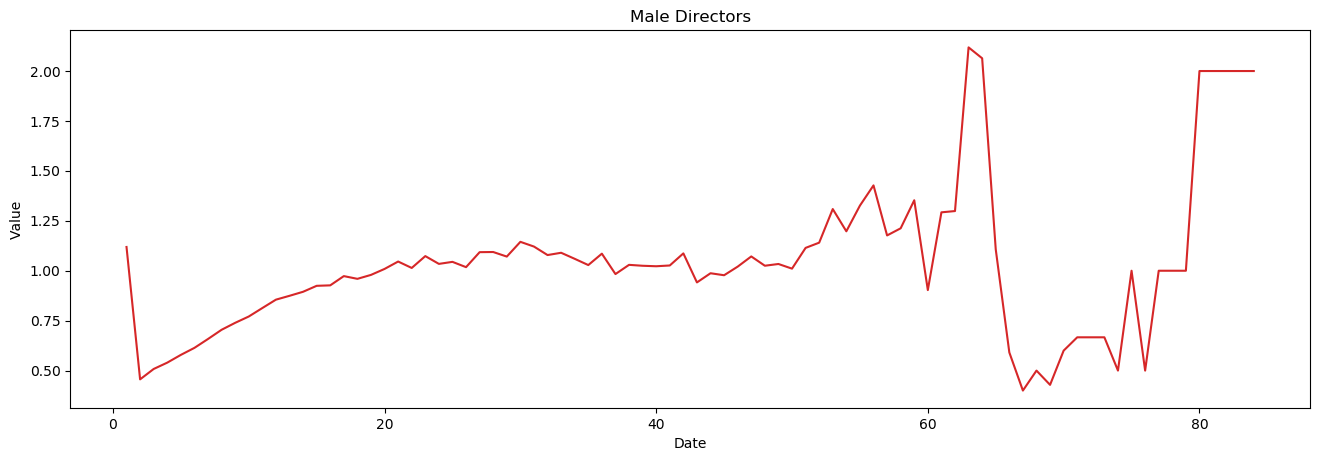

In [289]:
# Number of movies produced over the years by Male

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

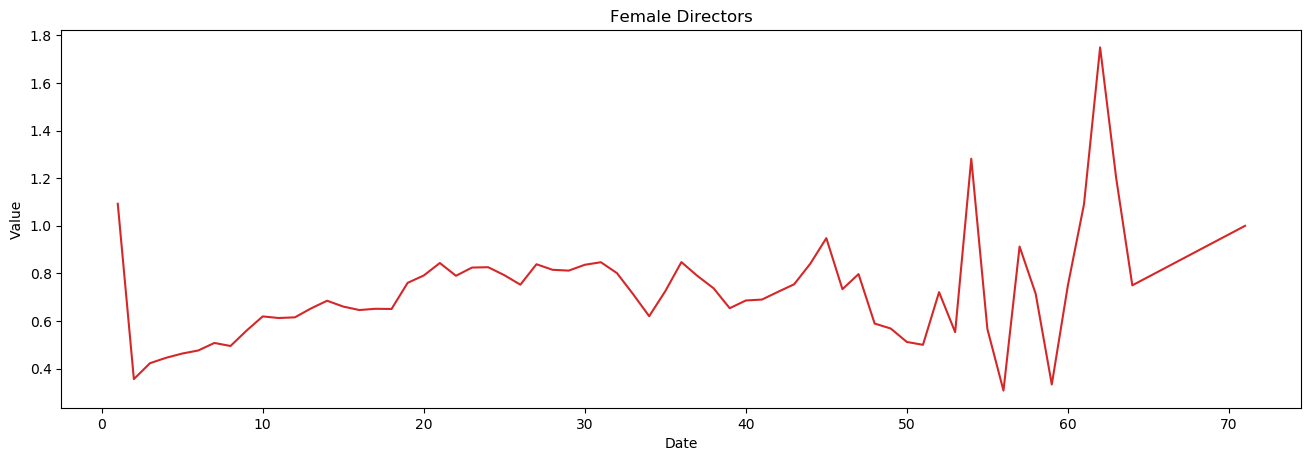

In [291]:
# Number of movies produced over the years by Female

careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

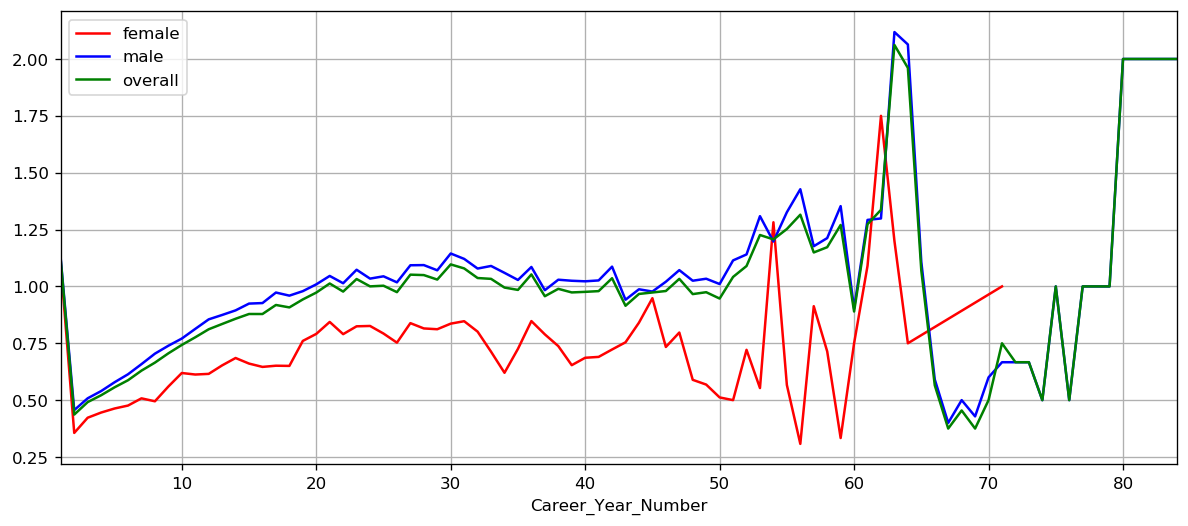

In [293]:
plt.figure(figsize=(12,5))
plt.xlabel('Etc')

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')
ax3 = overall_avg_movie_per_year.plot(color='green', grid=True, label='overall')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h2, l2 = ax3.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()